In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('dataset/spam.csv',encoding='latin-1')
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.rename(columns={'v1':'Label','v2':'SMS'},inplace=True)

In [4]:
df

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
X=df['SMS'].values
y=df['Label'].values

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(stop_words='english',lowercase=True).fit(X)
X_transformed=bow_transformer.transform(X)

In [7]:
X[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [8]:
transformed_sample=bow_transformer.transform([X[2]])
print(transformed_sample)

  (0, 77)	1
  (0, 402)	1
  (0, 411)	1
  (0, 784)	1
  (0, 1128)	1
  (0, 2110)	1
  (0, 2329)	1
  (0, 2875)	2
  (0, 3005)	2
  (0, 3121)	1
  (0, 3265)	1
  (0, 6010)	1
  (0, 6062)	1
  (0, 6115)	1
  (0, 7028)	1
  (0, 7388)	1
  (0, 7519)	1
  (0, 7701)	1
  (0, 8146)	1
  (0, 8185)	1


In [11]:
print(bow_transformer.get_feature_names_out()[3005])
print(bow_transformer.get_feature_names_out()[2875])

fa
entry


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y,test_size=0.20,random_state=42)

In [21]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))
print(cm)
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[954  11]
 [ 11 139]]
0.9802690582959641


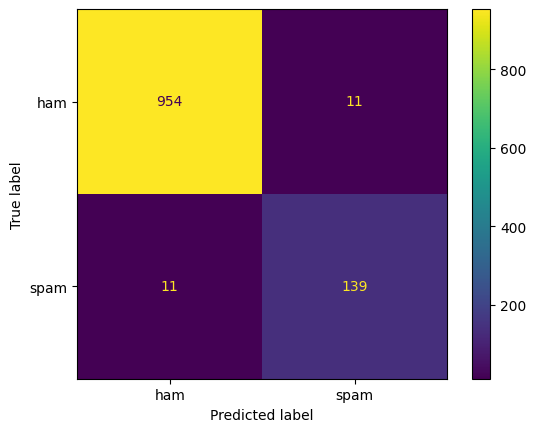

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[959   6]
 [ 12 138]]
0.9838565022421525


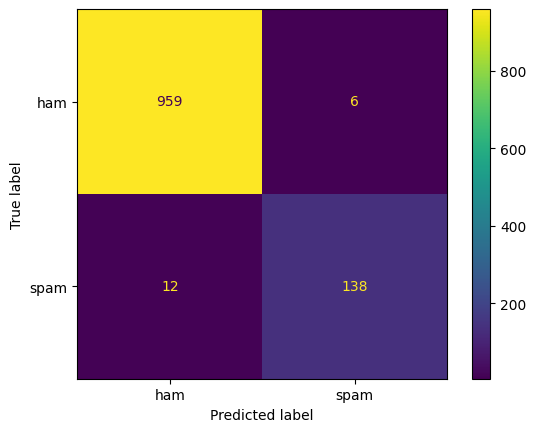

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

df=pd.read_csv('dataset/spam.csv',encoding='latin-1')
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.rename(columns={'v1':'Label','v2':'SMS'},inplace=True)
X=df['SMS'].values
y=df['Label'].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

steps=[('vect',CountVectorizer(stop_words='english',lowercase=True)),('model',MultinomialNB())]
pipe=Pipeline(steps)
model=pipe.fit(X_train,y_train)

predictions=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))
print(cm)
print(accuracy_score(y_test,predictions))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)